<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-Denoising%3A%20using%20Conv2D%20Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [115]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [149]:
noise_factor = .9
x_train_noisy  = x_train + noise_factor * np.random.normal(0, .5 , x_train.shape)
x_test_noisy  = x_test + noise_factor * np.random.normal(0, .5 , x_test.shape)

In [117]:
x_test_noisy, x_valid_noisy , x_test , x_valid_test = train_test_split(x_test_noisy, x_test , test_size=0.01)


In [121]:
x_valid_test.shape

(100, 28, 28, 1)

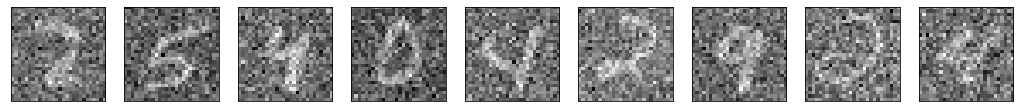

In [122]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [123]:
input_img = Input(shape=(28,28,1))
x = Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D( (2,2),padding='same')(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding = 'same')(x)
#x = Conv2D(128, (3,3), activation = 'relu', padding='same')(x)
#encoded = MaxPooling2D(pool_size=(2,2), padding = 'same')(x)

# = Conv2D(128, (3,3), activation = 'relu', padding='same')(encoded)
#x = UpSampling2D((2,2))(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs= input_img, outputs = decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [124]:
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 64)        0  

In [125]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1377 - val_loss: 0.1028
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0991 - val_loss: 0.0958
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0953 - val_loss: 0.0934
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0934 - val_loss: 0.0921
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0922 - val_loss: 0.0909
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0912 - val_loss: 0.0905
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0905 - val_loss: 0.0897
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0900 - val_loss: 0.0893
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0895 - val_loss: 0.0889
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0891 - val_loss: 0.0886

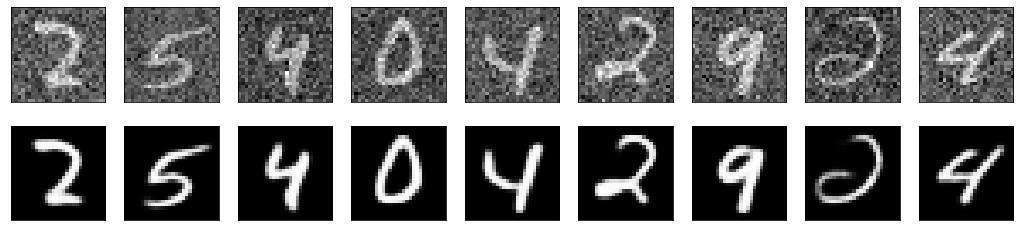

In [159]:
noise_factor = .5
x_valid_noisy  = x_test + noise_factor * np.random.normal(0, .5 , x_test.shape)
predicted_label = np.squeeze(autoencoder.predict(x_valid_noisy))
n = 10
plt.figure(figsize = (20,4))
for i in range(1, n):
  ax = plt.subplot(2, n , i+1)
  plt.imshow(x_valid_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n , i+1 +n)
  plt.imshow(predicted_label[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
